<a href="https://colab.research.google.com/github/roitraining/PythonML/blob/Development/Ch09-GraphDatabases/Ch09-GraphDatabases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/home/student/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


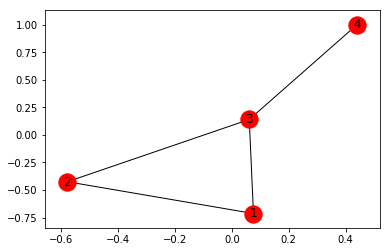

In [1]:
%matplotlib inline
import matplotlib as mp
import matplotlib.pyplot as plt
import networkx as nx
G=nx.Graph()
# G.add_node('Ralph')
# G.add_node('Martha')
# G.add_edges_from([('Ralph', 'Martha')])
G.add_edges_from([(1,2),(2,3),(1,3),(3,4)]) 
nx.draw_networkx(G)   
plt.show()

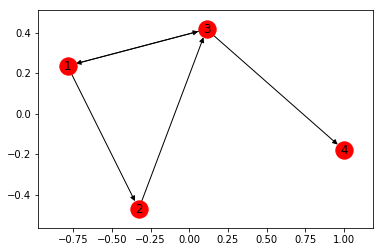

In [4]:
%matplotlib inline
G_directed = nx.DiGraph()
G_directed.add_edges_from([(1,2),(2,3),(1,3),(3,4), (3, 1)]) 
nx.draw_networkx(G_directed)  
plt.show()

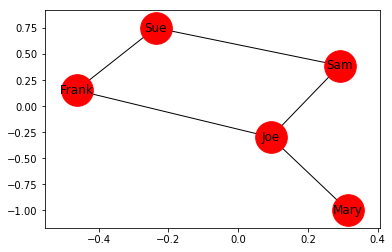

In [7]:
%matplotlib inline
import networkx as nx
G_names = nx.Graph()
G_names.add_edges_from([('Joe', "Mary"), ("Joe", "Frank"), ("Sue", "Frank"), ("Sam", "Joe"),\
                        ("Sue","Sam")])  
nx.draw_networkx(G_names, node_size = 1000) 
plt.show()

In [ ]:
%matplotlib inline
import numpy as np
adj = np.array([[0, 1, 1], 
                [1, 0, 1], 
                [1, 1, 0]])
G2 = nx.from_numpy_matrix(adj)
nx.draw_networkx(G2)
plt.show()

,weight,cost,a,b
0,4,7,A,D
1,7,1,B,A
2,10,9,C,E
3,5,8,E,A


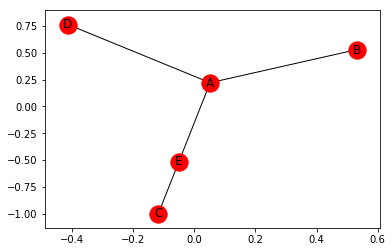

In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
rng = np.random.RandomState(seed=5)
ints = rng.randint(1, 11, size=(4,2))
a = ['A', 'B', 'C', 'E']
b = ['D', 'A', 'E', 'A']
df = pd.DataFrame(ints, columns=['weight', 'cost'])
df['a'] = a
df['b'] = b
display (df[['weight', 'cost', 'a', 'b']])
G3 = nx.from_pandas_edgelist(df, 'a', 'b', ['weight', 'cost'])
nx.draw_networkx(G3)
plt.show()

In [7]:
G3.nodes['A']['Color'] = 'Red'
G3.nodes['B']['Color'] = 'Purple'
G3.nodes['B']['Insensity'] = 10
print(G3.nodes(data=True))
print(G3.edges(data=True))


[('A', {'Color': 'Red'}), ('D', {}), ('B', {'Color': 'Purple', 'Insensity': 10}), ('C', {}), ('E', {})]
[('A', 'D', {'weight': 4, 'cost': 7}), ('A', 'B', {'weight': 7, 'cost': 1}), ('A', 'E', {'weight': 5, 'cost': 8}), ('C', 'E', {'weight': 10, 'cost': 9})]


[('A', {'whatever': 'abc', 'size': 100}), ('b', {'size': 50}), ('c', {'size': 90}), ('d', {'size': 30}), ('e', {'size': 40}), ('F', {'size': 70})]
[('A', 'b', {'weight': 0.6}), ('A', 'c', {'weight': 0.2}), ('A', 'd', {'weight': 0.3}), ('c', 'd', {'weight': 0.1}), ('c', 'e', {'weight': 0.7}), ('c', 'F', {'weight': 0.9}), ('d', 'F', {'weight': 0.5})]


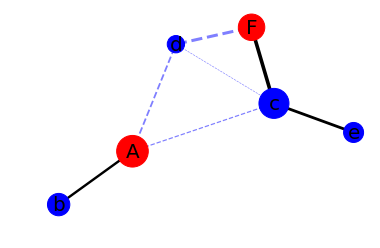

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx

G = nx.Graph()
G.add_node('A', whatever='abc')
G.add_edge('A', 'b', weight=0.6)
G.add_edge('A', 'c', weight=0.2)
G.add_edge('c', 'd', weight=0.1)
G.add_edge('c', 'e', weight=0.7)
G.add_edge('c', 'F', weight=0.9)
G.add_edge('A', 'd', weight=0.3)
G.nodes['A']['size'] = 100
G.nodes['b']['size'] = 50
G.nodes['c']['size'] = 90
G.nodes['d']['size'] = 30
G.nodes['e']['size'] = 40
G.nodes['F']['size'] = 70


G.add_edge('d','F', weight =.5)

print (G.nodes(data=True))
print(G.edges(data=True))

pos = nx.spring_layout(G)  # positions for all nodes

# sizes = [10 * d['size'] for k, d in G.nodes(data=True)]
# print(sizes)
# nx.draw_networkx_nodes(G, pos, node_size=sizes)
# plt.show()
elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] > 0.5]
elargeweight = [d['weight'] * 4 for (_, _, d) in G.edges(data=True) if d['weight'] > 0.5]

esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] <= 0.5]
esmallweight = [d['weight'] * 6 for (_, _, d) in G.edges(data=True) if d['weight'] <= 0.5]

pos = nx.spring_layout(G)  # positions for all nodes

# nodes
nodesizes = [10 * x['size'] for _,x in G.nodes(data=True)]
nodecolors = ['r' if x == x.upper() else 'b' for x in G.nodes]
nx.draw_networkx_nodes(G, pos, node_size=nodesizes, node_color=nodecolors)

# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge, width=elargeweight)
nx.draw_networkx_edges(G, pos, edgelist=esmall, width=esmallweight, alpha=0.5, edge_color='b', style='dashed')

# labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family='sans-serif')

plt.axis('off')
plt.show()



{'A': 0.44908840453122345, 'b': 0.16308540900253238, 'c': 0.5640720201515337, 'd': 0.5095021915361334, 'e': 0.2048400669766886, 'F': 0.3898635327253726}


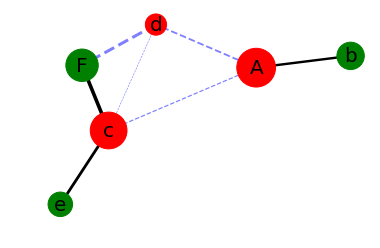

In [26]:
%matplotlib inline
pos = nx.spring_layout(G)  # positions for all nodes

# nodes
eigen = nx.eigenvector_centrality(G)
print (eigen)
nodesizes = [15 * x['size'] for _,x in G.nodes(data=True)]
nodecolors = ['r' if x >= .4 else 'g' for x in eigen.values()]
nx.draw_networkx_nodes(G, pos, node_size=nodesizes, node_color=nodecolors)

# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge, width=elargeweight)
nx.draw_networkx_edges(G, pos, edgelist=esmall, width=esmallweight, alpha=0.5, edge_color='b', style='dashed')

# labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family='sans-serif')

plt.axis('off')
plt.show()


# End of notebook